In [1]:
import numpy as np
import zipfile
import pandas as pd
import os
from PIL import Image

In [3]:
"""np_df = df.drop(['label', 'row_sum'], axis = 1).to_numpy()"""

"np_df = df.drop(['label', 'row_sum'], axis = 1).to_numpy()"

In [4]:
dictionary = {'paths_no_mask':[], 'path_img_masque': []}
mask = []
no_mask = []

files_no_mask = os.listdir('/home/simplon/datascript/projet-4-groupe-3/no mask/')
files_mask = os.listdir('/home/simplon/datascript/projet-4-groupe-3/mask pics/')

i = 0

for name in files_no_mask:
    i += 1
    dictionary['paths_no_mask'].append('/home/simplon/datascript/projet-4-groupe-3/no mask/' + name)
    img = Image.open(f'/home/simplon/datascript/projet-4-groupe-3/no mask/{name}').convert("L")
    pix = np.reshape(np.array(img, dtype='uint16'),(224*224))
    no_mask.append(pix)
    
for name in files_mask:
    i += 1
    dictionary['path_img_masque'].append('/home/simplon/datascript/projet-4-groupe-3/mask pics/' + name)
    img = Image.open(f'/home/simplon/datascript/projet-4-groupe-3/mask pics/{name}').convert("L")
    pix =  np.reshape(np.array(img, dtype='uint16'),(224*224))
    mask.append(pix)


In [5]:
df1 = pd.DataFrame.from_dict(dictionary.get('paths_no_mask'))
df2 = pd.DataFrame.from_dict(dictionary.get('path_img_masque'))

In [6]:
df1['values'] = 0
df2['values'] = 1

In [7]:
df = pd.concat([df1, df2])

In [8]:
df = df.rename(columns={0: 'image path'})

In [9]:
df['values'].value_counts()

0    310
1    310
Name: values, dtype: int64

In [10]:
pd.set_option('display.max_colwidth', None)
df

,image path,values
0,/home/simplon/datascript/projet-4-groupe-3/no mask/22.jpg,0
1,/home/simplon/datascript/projet-4-groupe-3/no mask/55.jpg,0
2,/home/simplon/datascript/projet-4-groupe-3/no mask/106.jpg,0
3,/home/simplon/datascript/projet-4-groupe-3/no mask/251.jpg,0
4,/home/simplon/datascript/projet-4-groupe-3/no mask/165.jpg,0
...,...,...
305,/home/simplon/datascript/projet-4-groupe-3/mask pics/133.jpg,1
306,/home/simplon/datascript/projet-4-groupe-3/mask pics/176.jpg,1
307,/home/simplon/datascript/projet-4-groupe-3/mask pics/39.jpg,1
308,/home/simplon/datascript/projet-4-groupe-3/mask pics/233.jpg,1


In [11]:
img = Image.open('/home/simplon/datascript/projet-4-groupe-3/mask pics/3.jpg').convert("L")
pix = np.array(img)

In [12]:
mask[0].shape

(50176,)

In [13]:
df_array = pd.DataFrame(no_mask)

In [14]:
"""df_array["row_sum"] = 0
df_array["row_sum"] = df.drop(["row_sum"], axis = 1).sum(axis=1)"""

'df_array["row_sum"] = 0\ndf_array["row_sum"] = df.drop(["row_sum"], axis = 1).sum(axis=1)'

In [15]:
df_array['label'] = 0

In [16]:
df_array["row_sum"] = 0
df_array["row_sum"] = df_array.drop(["label", "row_sum"], axis = 1).sum(axis=1)

In [17]:
df_array

,0,1,2,3,4,5,6,7,8,9,...,50168,50169,50170,50171,50172,50173,50174,50175,label,row_sum
0,154,154,155,155,155,155,154,154,154,154,...,41,40,43,44,43,43,45,43,0,6650125
1,127,127,127,127,127,127,127,127,128,127,...,164,164,164,163,163,163,163,163,0,6917250
2,129,129,128,128,128,127,127,127,127,128,...,154,155,157,156,154,154,154,156,0,6785072
3,156,156,157,156,156,155,156,156,157,157,...,193,193,193,192,193,193,194,194,0,7478148
4,128,129,129,129,129,129,129,128,129,129,...,161,161,161,162,162,162,162,162,0,7229256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,153,154,154,154,154,154,153,153,154,154,...,43,46,48,49,51,54,60,65,0,7074492
306,138,138,138,137,137,136,136,136,136,136,...,168,168,168,168,169,169,169,169,0,7497142
307,157,157,157,158,158,157,156,156,155,154,...,48,50,49,45,46,54,62,65,0,7131142
308,142,142,142,142,142,141,141,140,141,141,...,31,32,32,37,39,42,46,41,0,6283432


In [18]:
"""lst_arrys = [for i in no_mask:]"""

'lst_arrys = [for i in no_mask:]'

In [19]:
flatten_x = np.concatenate(mask)

In [20]:
img_no_mask = np.mean(np.array(no_mask), axis=0)
img_mask = np.mean(np.array(mask), axis=0)

In [21]:
np.array(no_mask)

array([[154, 154, 155, ...,  43,  45,  43],
       [127, 127, 127, ..., 163, 163, 163],
       [129, 129, 128, ..., 154, 154, 156],
       ...,
       [157, 157, 157, ...,  54,  62,  65],
       [142, 142, 142, ...,  42,  46,  41],
       [128, 128, 128, ..., 155, 155, 156]], dtype=uint16)

In [22]:
import matplotlib.pyplot as plt

In [23]:
img_no_mask.shape

(50176,)

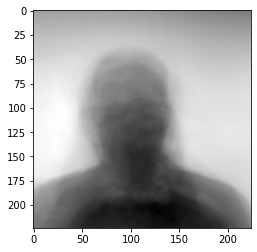

In [24]:
plt.imshow(np.reshape(img_no_mask, (224, 224)), cmap="gray")

plt.imshow(np.reshape(, (224, 224)), cmap="gray")

In [25]:
mean_mask = np.mean(np.array(mask), axis=0)
mean_no_mask = np.mean(np.array(no_mask), axis=0)

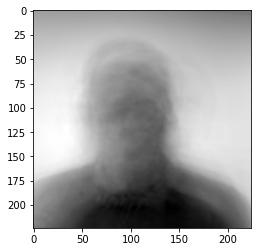

In [26]:
plt.imshow(np.reshape(img_mask, (224, 224)), cmap="gray")

In [27]:
array_1 = np.power((mean_mask - mask[1]), 2)
array_2 = np.power((mean_no_mask - mask[1]), 2)


In [28]:
array_2.sum()

76612732.43900104

In [29]:
array_1.sum()

79258004.90387096

In [30]:
values = df['values'].to_list()

In [34]:
lst_pred_mask = []
all_pics = no_mask + mask

for j in all_pics:
    array_1 = np.power((mean_mask - j), 2)
    array_2 = np.power((mean_no_mask - j), 2)
    if array_1.sum() < array_2.sum():
        lst_pred_mask.append(1)
    else:
        lst_pred_mask.append(0)

In [35]:
len(lst_pred_mask)

620

In [36]:
from sklearn.metrics import classification_report

print(classification_report(df['values'], lst_pred_mask))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72       310
           1       0.73      0.71      0.72       310

    accuracy                           0.72       620
   macro avg       0.72      0.72      0.72       620
weighted avg       0.72      0.72      0.72       620



<AxesSubplot:>

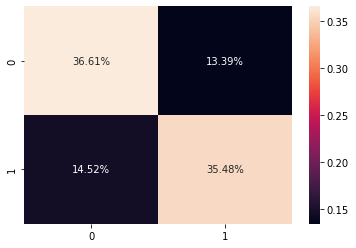

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

cm = confusion_matrix(df['values'], lst_pred_mask)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')

In [ ]:
"""df.to_csv('all_mask.csv', index=False,)"""